In [3]:
library (ggplot2)
titanic=read.csv("C:\\Users\\student\\Documents\\Applied Data Mining\\train.csv")

In [4]:
sum(is.na(titanic))

[1] 177

In [5]:
titanic[is.na(titanic$Age),]$Age=mean(titanic$Age, na.rm = TRUE)

In [6]:
titanic$PassengerId = NULL
titanic$Name = NULL

In [7]:
mean(titanic$Age)

[1] 29.69912

In [8]:
mean(titanic[titanic$Sex=="female",]$Age)

[1] 28.21673

In [9]:
median(titanic[titanic$Pclass==1,]$Fare)

[1] 60.2875

In [10]:
median(titanic[(titanic$Sex=="female")&(titanic$Pclass!=1),]$Fare)

[1] 14.45625

In [11]:
median(titanic[(titanic$Survived==TRUE)&(titanic$Sex=="female")&(titanic$Pclass!=3),]$Age)

[1] 30

In [12]:
mean(titanic[(titanic$Sex=="female")&(titanic$Survived==TRUE)&(titanic$Age>=13)&(titanic$Age<=18),]$Fare)

[1] 53.96343

In [13]:
mean(titanic[(titanic$Sex=="female")&(titanic$Pclass==1)&(titanic$Survived==TRUE)&(titanic$Age>=13)&(titanic$Age<=18),]$Fare)
mean(titanic[(titanic$Sex=="female")&(titanic$Pclass==2)&(titanic$Survived==TRUE)&(titanic$Age>=13)&(titanic$Age<=18),]$Fare)
mean(titanic[(titanic$Sex=="female")&(titanic$Pclass==3)&(titanic$Survived==TRUE)&(titanic$Age>=13)&(titanic$Age<=18),]$Fare)

[1] 125.0667

[1] 18.0118

[1] 8.9341

In [14]:
averageFare=mean(titanic$Fare)
(nrow(titanic[(titanic$Survived==TRUE)&(titanic$Fare>averageFare),]))/(nrow(titanic[(titanic$Fare>averageFare),]))

[1] 0.5971564

In [15]:
sdFare=sd(titanic$Fare)
titanic$sfare <- ((titanic$Fare - mean(titanic$Fare))/sdFare)

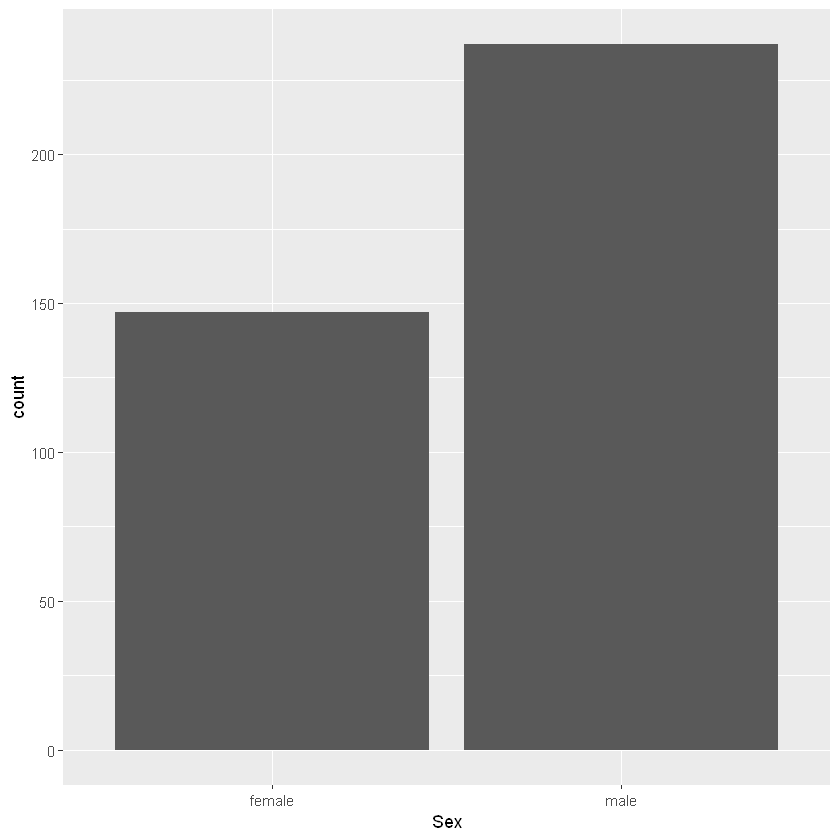

In [16]:
ggplot(titanic)+geom_bar(data=titanic[titanic$Age<mean(titanic$Age),], mapping = aes(x=Sex, fill=Survived))

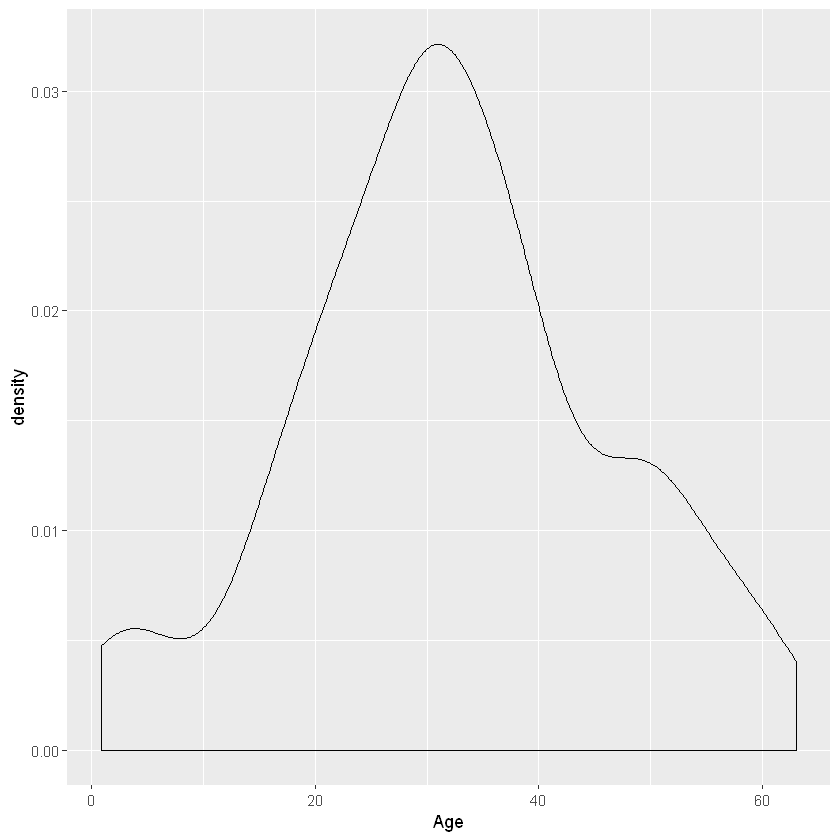

In [17]:
ggplot(titanic)+geom_density(data=titanic[(titanic$Survived==TRUE)&(titanic$Fare>mean(titanic$Fare)),],mapping = aes(x=Age))

Warning message:
"Groups with fewer than two data points have been dropped."

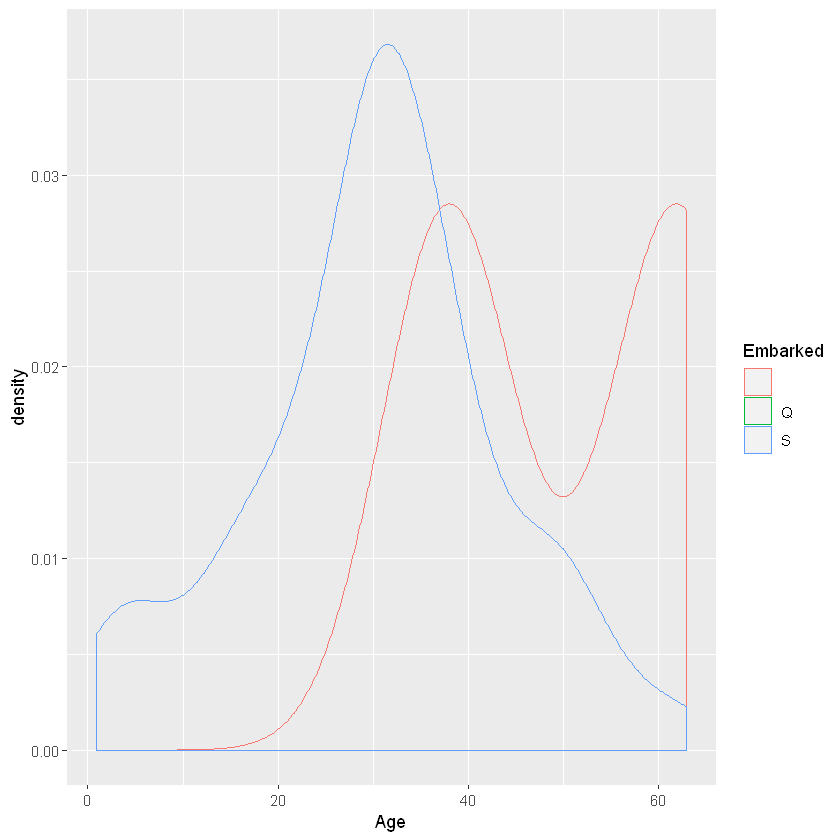

In [18]:
ggplot(titanic)+geom_density(data=titanic[(titanic$Survived==TRUE)&(titanic$Fare>mean(titanic$Fare))&(titanic$Embarked!="C"),],mapping = aes(x=Age,color=Embarked))

In [19]:
titanic$cfare <- ifelse(titanic$Fare > mean(titanic$Fare), "expensive", "cheap")

In [20]:
titanic$cage <- ifelse(titanic$Age <= 10, 0, ifelse(titanic$Age <= 20, 1, ifelse(titanic$Age <= 30, 2, ifelse(titanic$Age <= 40, 3, ifelse(titanic$Age <= 50, 4, ifelse(titanic$Age <= 60, 5, ifelse(titanic$Age <= 70, 6, 7)))))))

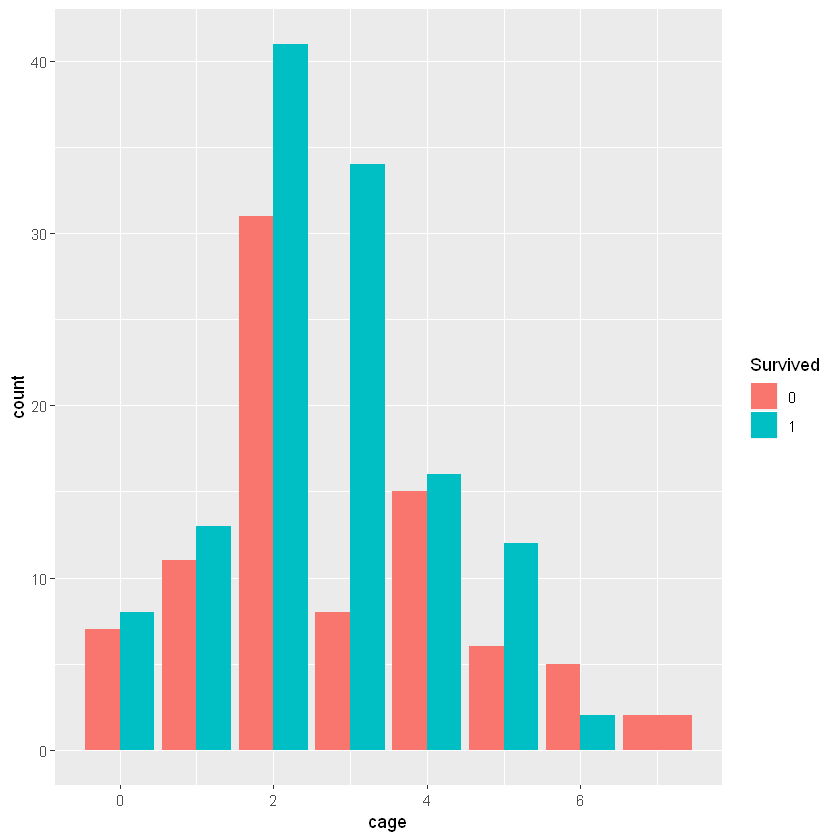

In [21]:
titanic$Survived <- factor(titanic$Survived)
ggplot(titanic) + geom_bar(data=titanic[titanic$Fare>mean(titanic$Fare),],mapping=aes(x=cage,fill=Survived),position="dodge")

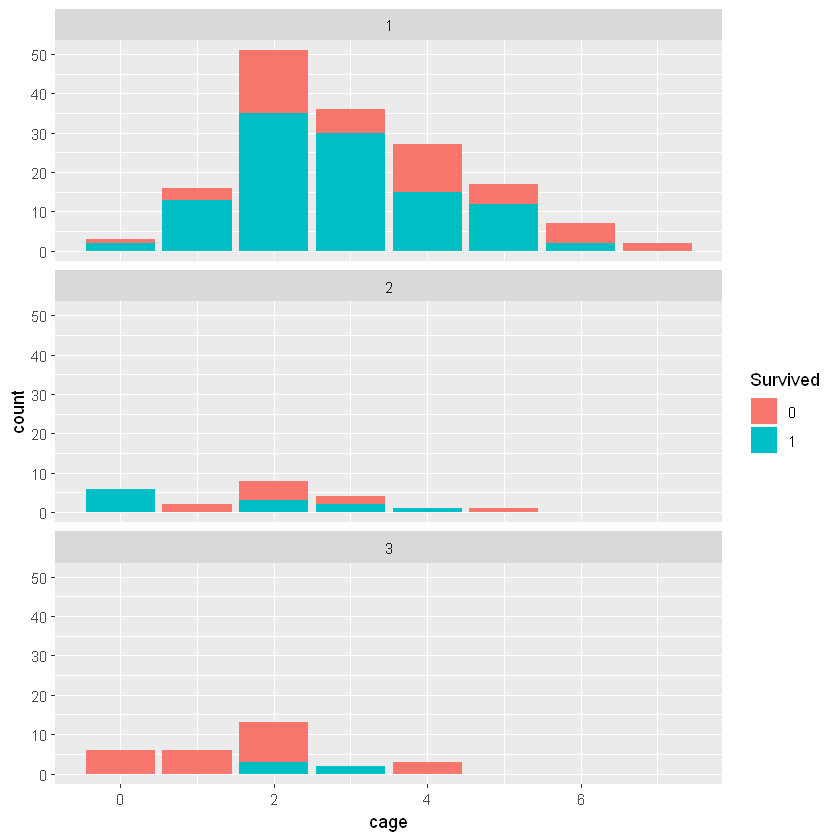

In [22]:
ggplot(data = titanic)+geom_bar(data=titanic[titanic$Fare>mean(titanic$Fare),],mapping = aes(x = cage, fill=Survived))+facet_wrap(~ Pclass, nrow = 3)